### Enforcing Fairness in Fitzpatrick

This code demonstrates how to enforce fairness when working with deep neural networks in computer vision. Specifically we demonstrate how different notions of fairness and performance can be measured and enforced with our toolkit.

The protected attribute is Male. The user can specify what target attribute (e.g., Wearing_Earrings) that they would like to consider. 

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
%%capture
!pip install git+https://github.com/ChrisMRuss/oxon-fair.git


In [3]:
import numpy as np 
import oxonfair
from oxonfair.utils import group_metrics as gm
from matplotlib import pyplot as plt

In [6]:
fitz_outputs_val = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_balanced_outputs_val_fitz17k.npy')
fitz_outputs_test = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_balanced_outputs_test_fitz17k.npy')
fitz_target_labels_val = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_target_labels_val.npy')
fitz_protected_labels_val = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_protected_labels_val.npy')
fitz_target_labels_test = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_target_labels_test.npy')
fitz_protected_labels_test = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_protected_labels_test.npy')


In [8]:
np.load(r"Fitzpatrick_newresults/acc_60_20_20_1_balanced_outputs_test_fitz17k.npy")

array([[-10.15978336,   1.0801748 ],
       [-11.72682285,   0.20366317],
       [ -3.69721842,   0.61894643],
       ...,
       [ -7.39955568,   0.81881356],
       [-16.78993988,   0.11131278],
       [  0.8465578 ,  -0.03252508]])

In [9]:
# Load the numpy file

output_val = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_balanced_outputs_val_fitz17k.npy')
output_test = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_balanced_outputs_test_fitz17k.npy')
# Print the first items
#plt.hist((output[:,target_attribute_index]), bins=100)

def sigmoid(logits):
    return 1 / (1 + np.exp(-logits))

target_attribute_index=1
prediction_scores = sigmoid(output_val[:, target_attribute_index])
print(prediction_scores)
prediction_scores = sigmoid(output_val[:, 0])
print(prediction_scores)


[0.56106494 0.59723909 0.57536941 ... 0.53948229 0.60455356 0.50199867]
[3.97100109e-02 2.68632119e-04 1.99517478e-04 ... 9.97607407e-02
 1.51117870e-05 4.08532745e-07]


In [11]:

# target attribute index = 34 - wear earringsi
import numpy as np
import pandas as pd

# Load the numpy file
output_val = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_balanced_outputs_val_fitz17k.npy')
output_test = np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_balanced_outputs_test_fitz17k.npy')
# Print the first items
#plt.hist((output[:,target_attribute_index]), bins=100)

def sigmoid(logits):
    return 1 / (1 + np.exp(-logits))


target_attribute_index=0 
prediction_scores = sigmoid(output_val[:, target_attribute_index])
print(prediction_scores)



val_results, test_results=pd.DataFrame(), pd.DataFrame()
val_results['protected']=np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_protected_labels_val.npy').astype(bool)
val_results['target']=np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_target_labels_val.npy').astype(int)
val_results['biased_scores']=prediction_scores
val_results['biased_label']=(prediction_scores>0.5).astype(int)
test_results['protected']=np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_protected_labels_test.npy').astype(bool)
test_results['target']=np.load(r'Fitzpatrick_newresults/acc_60_20_20_1_fitz17k_target_labels_test.npy').astype(int)
test_results['biased_scores']=sigmoid(output_test[:, target_attribute_index])
test_results['biased_label']=(sigmoid(output_test[:, target_attribute_index])>0.5).astype(int)


[3.97100109e-02 2.68632119e-04 1.99517478e-04 ... 9.97607407e-02
 1.51117870e-05 4.08532745e-07]


### Enforcing Fairness

In [12]:
good_outcome=1
#base rate
print(val_results.target.value_counts(normalize=True)[good_outcome])
print(val_results[val_results.protected==True].target.value_counts(normalize=True))
print(val_results[val_results.protected==False].target.value_counts(normalize=True))
print(val_results.protected.value_counts(normalize=True))
print('The base rate disparity is {}'.format(val_results[val_results.protected==False].target.value_counts(normalize=True)[good_outcome] - val_results[val_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


0.14343877231443783
target
0    0.876877
1    0.123123
Name: proportion, dtype: float64
target
0    0.847311
1    0.152689
Name: proportion, dtype: float64
protected
False    0.687128
True     0.312872
Name: proportion, dtype: float64
The base rate disparity is 0.029566029110240588


In [6]:
%run "../clean_functions.py"

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
pip install 'aif360[FairAdapt]'


In [14]:
val_results

,protected,target,biased_scores,biased_label
0,True,1,3.971001e-02,0
1,False,0,2.686321e-04,0
2,False,0,1.995175e-04,0
3,False,1,9.273041e-01,1
4,False,0,5.880302e-08,0
...,...,...,...,...
3188,True,0,8.052018e-03,0
3189,True,0,1.875442e-06,0
3190,True,1,9.976074e-02,0
3191,True,0,1.511179e-05,0


In [35]:
test_metrics= run_all_results_clean(test_results, val_results, good_outcome)

Calculate demographic parity


100%|██████████| 100/100 [00:03<00:00, 26.96it/s]


Calculate equality of opportunity


100%|██████████| 100/100 [03:00<00:00,  1.81s/it]


Calculate accuracy


100%|██████████| 100/100 [00:00<00:00, 1543.69it/s]


Calculate precision


100%|██████████| 100/100 [00:00<00:00, 500.44it/s]


Calculate recall


100%|██████████| 100/100 [00:00<00:00, 942.13it/s]


In [7]:
%run "../visualisations.py"

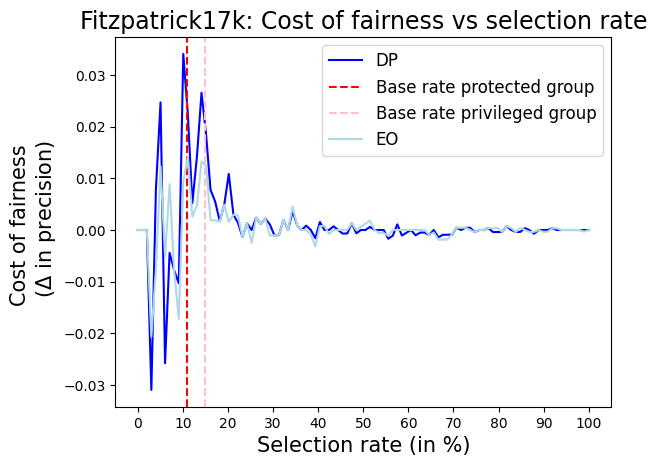

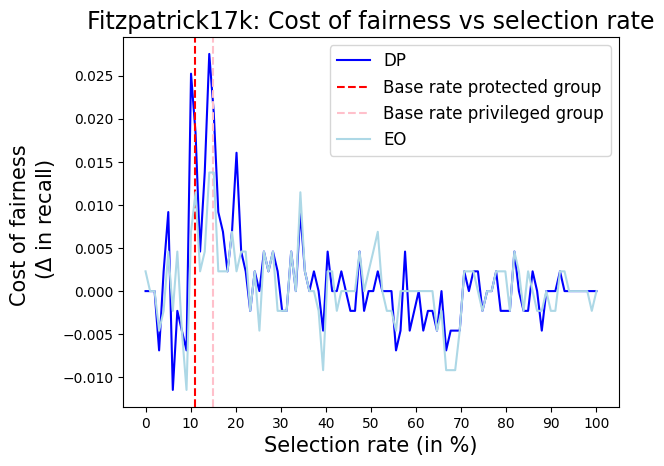

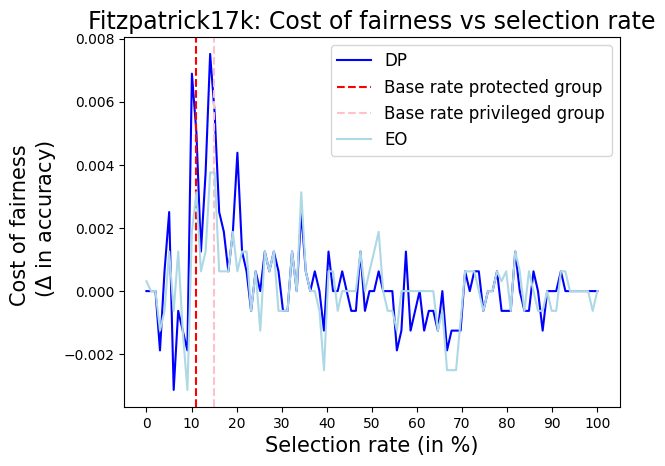

In [38]:
dataset='Fitzpatrick17k'
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')  
plot_cost(test_metrics['rec_unfair'],test_metrics['rec_dp'],C_list, test_results, 'recall', 'DP', dataset, test_metrics['rec_eo'], 'EO') 
plot_cost(test_metrics['acc_unfair'],test_metrics['acc_dp'],C_list, test_results, 'accuracy', 'DP', dataset, test_metrics['acc_eo'], 'EO') 

In [39]:
#save results
import pickle
with open('Results/fitzpatrick/test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open('Results/fitzpatrick/val_results.pkl', 'wb') as f:
    pickle.dump(val_results, f)
with open('Results/fitzpatrick/test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)
#with open('Results/fitzpatrick/val_metrics.pkl', 'wb') as f:
    #pickle.dump(val_metrics, f)

In [40]:
#base rate
print(test_results.target.value_counts(normalize=True)[good_outcome])
print(test_results[test_results.protected==True].target.value_counts(normalize=True))
print(test_results[test_results.protected==False].target.value_counts(normalize=True))
print(test_results.protected.value_counts(normalize=True))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


0.13654870028186658
target
0    0.89064
1    0.10936
Name: proportion, dtype: float64
target
0    0.850781
1    0.149219
Name: proportion, dtype: float64
protected
False    0.682117
True     0.317883
Name: proportion, dtype: float64
The base rate disparity is 0.03985986148995553


In [42]:
from sklearn.metrics import roc_auc_score
print('The AUC of the biased model (validation set) is:', roc_auc_score(val_results.target,val_results.biased_scores))
print('The AUC of the biased model (test set) is:', roc_auc_score(test_results.target,test_results.biased_scores))
print('The AUC of the biased model for the protected group (validation set) is:', roc_auc_score(val_results[val_results.protected==True].target,val_results[val_results.protected==True].biased_scores))
print('The AUC of the biased model for the privileged group (validation set) is:', roc_auc_score(val_results[val_results.protected==False].target,val_results[val_results.protected==False].biased_scores))
print('The AUC of the biased model for the protected group (test set) is:', roc_auc_score(test_results[test_results.protected==True].target,test_results[test_results.protected==True].biased_scores))
print('The AUC of the biased model for the privileged group (test set) is:', roc_auc_score(test_results[test_results.protected==False].target,test_results[test_results.protected==False].biased_scores))
print('The base rate disparity is {}'.format(val_results[val_results.protected==False].target.value_counts(normalize=True)[good_outcome] - val_results[val_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


The AUC of the biased model (validation set) is: 0.8367762228271717
The AUC of the biased model (test set) is: 0.8257446433265783
The AUC of the biased model for the protected group (validation set) is: 0.8328414448528048
The AUC of the biased model for the privileged group (validation set) is: 0.8387353174953633
The AUC of the biased model for the protected group (test set) is: 0.8141692577533286
The AUC of the biased model for the privileged group (test set) is: 0.8292581676283781
The base rate disparity is 0.029566029110240588


In [43]:
# cost rounded to 3 digits after the comma
print('precision')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))
print('recall')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_eo'])])))
print('accuracy')
print('The average cost of fairness (DP) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_dp'])])))
print('The average cost of fairness (EO) is {:.3f}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_eo'])])))

precision
The average cost of fairness (DP) is 0.001
The average cost of fairness (EO) is 0.000
recall
The average cost of fairness (DP) is 0.001
The average cost of fairness (EO) is 0.001
accuracy
The average cost of fairness (DP) is 0.000
The average cost of fairness (EO) is 0.000
